### 1.构造数据集

In [404]:
import numpy as np

In [405]:
X = np.arange(0,100,0.1)
y = 2.2021 * X + np.random.randn(len(X))

In [406]:
X = np.expand_dims(X, axis=1)

### 2.构造模型

- **表达式**: $y=\omega x + b$
- **LOSS**:   MSE Mean Square Error 均方差 作为 loss,
     - 即: $\frac{1}{2m}\sum_1^m(h_{\theta}(x) - y) ^2$ ; m为样本数量，分母加2是因为便于求导是月掉，对结果无影响
         - 其中: $h_{\theta}(x)$ = $\theta_0 + \theta_1 x_1  + ... +  \theta _m x_m$

In [398]:
class LinearRegression:
    
    def __init__(self, alpha=0.0000001, epoch=10000):
        self.alpha=alpha
        self.epoch=epoch

    def fit(self, X, y):
        self.X = X
        self.y = y      
        self.m = len(X)
        self.n = len(X[0])
        
        # 因为 有 theta0， 所以给添加一行 X0; 同理, theta 的长度为 feature 长度+1
        self.X = np.hstack((np.ones((self.m, 1)), self.X))
        self.theta = np.zeros((self.n+1, 1))
        
        # 行向量转为列
        self.y = self.y.reshape(-1,1)
        return self._gradientDescent()
        
    def _gradientDescent(self):
        temp = np.matrix(np.zeros((self.n+1, self.epoch)))
        history = np.zeros((self.epoch, 1))
        
        for i in range(self.epoch):
            h=np.dot(self.X, self.theta)
            
            temp[:, i] = self.theta - (self.alpha/self.m)*(np.dot(np.transpose(self.X), h-self.y))
                
            self.theta = temp[:, i]
            history[i] = self._compute_cost()
            
        return self.theta, history
    
    def _compute_cost(self):
        L = (np.transpose(self.X * self.theta-self.y))*(self.X*self.theta-self.y)/(2*self.m)
        return L
    
    def predict(self, x_test):
        x_test = np.hstack((np.ones((len(x_test), 1)), x_test))
        result = np.dot(x_test, self.theta)
        return result

### 3. 训练和测试

In [399]:
lr = LinearRegression(alpha=0.0000001, epoch=10000)

In [400]:
theta, history = lr.fit(X, y)

In [401]:
print(theta)

[[0.03188139]
 [2.12401456]]


In [402]:
lr.predict([[1]])

matrix([[2.15589596]])

### 4. 可视化

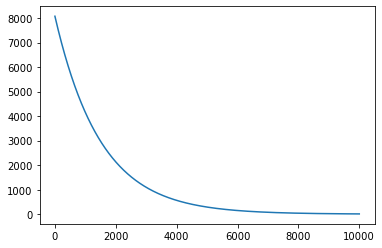

In [403]:
import matplotlib.pyplot as plt
plt.plot(history)